# Time Series Analysis:

1. Time Series Analysis is a concept which deals with study of data in which the data is observed over a period of time. 
2. The data may include about a system, machine, business, product or anyother output generating thing which is studied over a period of time.
3. We mostly do univariate time series analysis and we tend to obeserve the single variable data for a particular period of time.
4. We tend to see if there is any trend in the data over a period of time. 

##### Process of Time series Analysis for open power system data.



In [1]:
# importing time series data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt\
    

In [21]:
# importing the data
df_power = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
df_power

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [3]:
df_power.shape

(4383, 5)

In [22]:
# converting the Data column's datatype to datetime
df_power['Date'] = pd.to_datetime(df_power['Date'])

In [6]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [23]:
# set the Date column as the index in the dataframe as for Time Series Analysis the index must be datetime
df_power = df_power.set_index("Date")
df_power

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [24]:
# adding new columns
df_power['Year'] = df_power.index.year
df_power['month'] = df_power.index.month
df_power['Weekday'] = df_power.index.strftime("%A")

In [26]:
df_power

,Consumption,Wind,Solar,Wind+Solar,Year,month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


<AxesSubplot: xlabel='Date'>

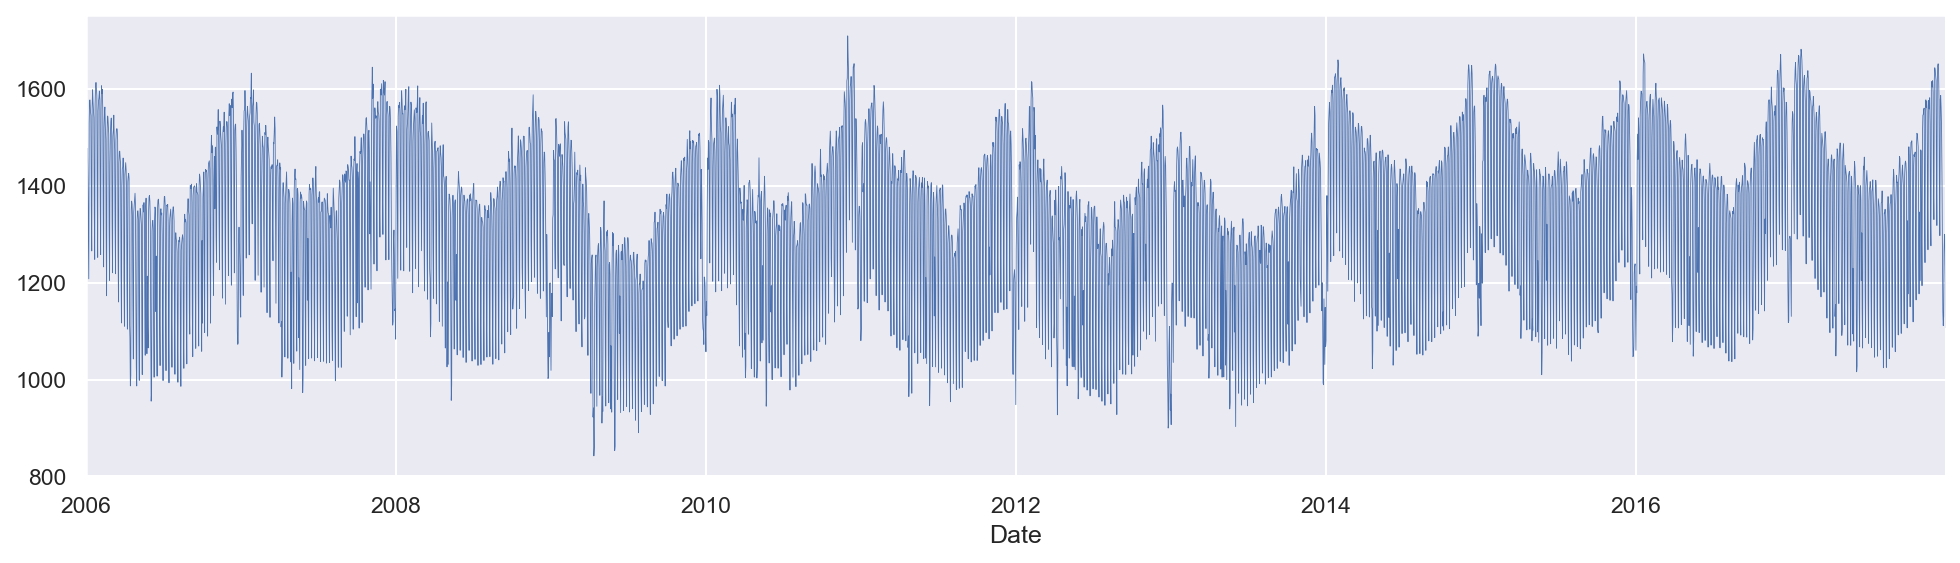

In [28]:
sns.set(rc={"figure.figsize":(16,4)})
plt.rcParams['figure.dpi'] = 150
df_power["Consumption"].plot(linewidth=0.4)

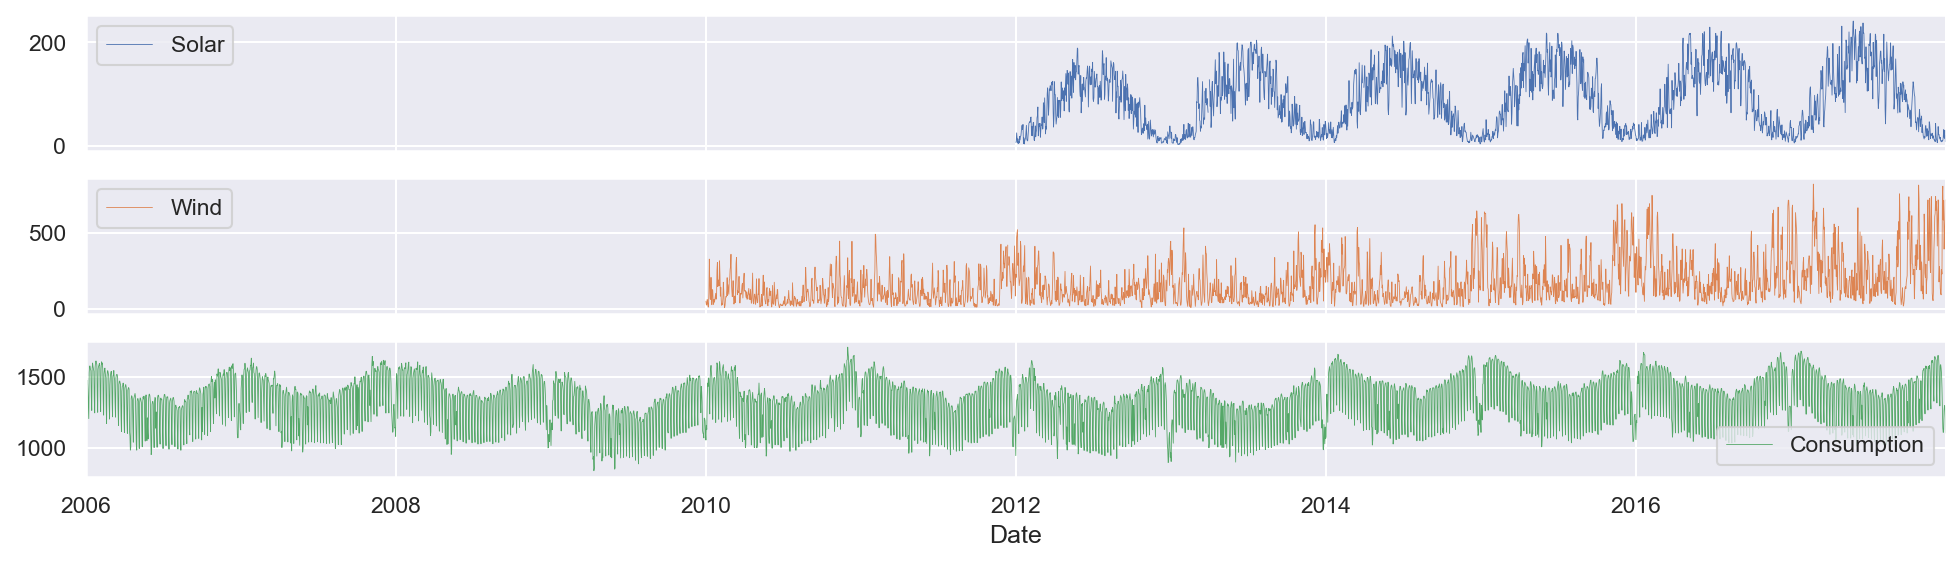

In [30]:
axes = df_power[["Solar","Wind","Consumption"]].plot(linewidth=0.4,subplots=True)